# AIM

畳み込みニューラルネットワークでMNIST画像分類 with TensorFlow

In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import tensorflow as tf
from sklearn.datasets import fetch_mldata

In [2]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["numpy", "tensorflow", "matplotlib", "scikit-learn"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

numpy 1.13.1
tensorflow 1.3.0
matplotlib 2.0.2
scikit-learn 0.18.2


In [75]:
# ネットワークの定義

# プレースホルダー
x_ = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y_ = tf.placeholder(tf.float32, shape=(None, 10))
# 畳み込み層1
conv1_features = 20 # 畳み込み層1の出力次元数
max_pool_size1 = 2 # 畳み込み層1のマックスプーリングサイズ
conv1_w = tf.Variable(tf.truncated_normal([5, 5, 1, conv1_features], stddev=0.1), dtype=tf.float32) # 畳み込み層1の重み
conv1_b = tf.Variable(tf.constant(0.1, shape=[conv1_features]), dtype=tf.float32) # 畳み込み層1のバイアス
conv1_c2 = tf.nn.conv2d(x_, conv1_w, strides=[1, 1, 1, 1], padding="SAME") # 畳み込み層1-畳み込み
conv1_relu = tf.nn.relu(conv1_c2+conv1_b) # 畳み込み層1-ReLU
conv1_mp = tf.nn.max_pool(conv1_relu, ksize=[1, max_pool_size1, max_pool_size1, 1], strides=[1, max_pool_size1, max_pool_size1, 1], padding="SAME") # 畳み込み層1-マックスプーリング
# 畳み込み層2
conv2_features = 50 # 畳み込み層2の出力次元数
max_pool_size2 = 2 # 畳み込み層2のマックスプーリングのサイズ
conv2_w = tf.Variable(tf.truncated_normal([5, 5, conv1_features, conv2_features], stddev=0.1), dtype=tf.float32) # 畳み込み層2の重み
conv2_b = tf.Variable(tf.constant(0.1, shape=[conv2_features]), dtype=tf.float32) # 畳み込み層2のバイアス
conv2_c2 = tf.nn.conv2d(conv1_mp, conv2_w, strides=[1, 1, 1, 1], padding="SAME") # 畳み込み層2-畳み込み
conv2_relu = tf.nn.relu(conv2_c2+conv2_b) # 畳み込み層2-ReLU
conv2_mp = tf.nn.max_pool(conv2_relu, ksize=[1, max_pool_size2, max_pool_size2, 1], strides=[1, max_pool_size2, max_pool_size2, 1], padding="SAME") # 畳み込み層2-マックスプーリング
# 全結合層1
result_w = x_.shape[1] // (max_pool_size1*max_pool_size2)
result_h = x_.shape[2] // (max_pool_size1*max_pool_size2)
fc_input_size = result_w * result_h * conv2_features # 畳み込んだ結果、全結合層に入力する次元数
fc_features = 500 # 全結合層の出力次元数（隠れ層の次元数）
s = conv2_mp.get_shape().as_list() # [None, result_w, result_h, conv2_features]
conv_result = tf.reshape(conv2_mp, [-1, s[1]*s[2]*s[3]]) # 畳み込みの結果を1*N層に変換
fc1_w = tf.Variable(tf.truncated_normal([fc_input_size.value, fc_features], stddev=0.1), dtype=tf.float32) # 重み
fc1_b = tf.Variable(tf.constant(0.1, shape=[fc_features]), dtype=tf.float32) # バイアス
fc1 = tf.nn.relu(tf.matmul(conv_result, fc1_w)+fc1_b) # 全結合層1
# 全結合層2
fc2_w = tf.Variable(tf.truncated_normal([fc_features, fc_features], stddev=0.1), dtype=tf.float32) # 重み
fc2_b = tf.Variable(tf.constant(0.1, shape=[fc_features]), dtype=tf.float32) # バイアス
fc2 = tf.nn.relu(tf.matmul(fc1, fc2_w)+fc2_b) # 全結合層2
# 全結合層3
fc3_w = tf.Variable(tf.truncated_normal([fc_features, 10], stddev=0.1), dtype=tf.float32) # 重み
fc3_b = tf.Variable(tf.constant(0.1, shape=[10]), dtype=tf.float32) # バイアス
y = tf.matmul(fc2, fc3_w)+fc3_b
# クロスエントロピー誤差
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# 勾配法
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# 正解率の計算
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Train
epoch:	1	total loss:	62.236075043678284	varidation accuracy:	0.8810999989509583	time:	182.28082919120789
epoch:	2	total loss:	19.71042910218239	varidation accuracy:	0.9279999732971191	time:	174.26870799064636
epoch:	3	total loss:	13.899885520339012	varidation accuracy:	0.9426000118255615	time:	173.1966462135315
epoch:	4	total loss:	10.918829202651978	varidation accuracy:	0.9544000029563904	time:	170.9794158935547
epoch:	5	total loss:	8.94124611467123	varidation accuracy:	0.9624999761581421	time:	157.5356090068817

Predict


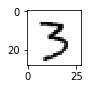

=> 3 



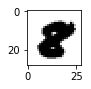

=> 8 



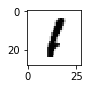

=> 1 



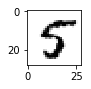

=> 5 



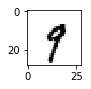

=> 9 



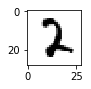

=> 2 



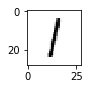

=> 1 



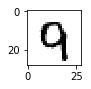

=> 9 



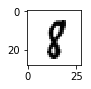

=> 8 



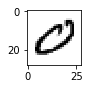

=> 0 



In [107]:
# 学習

EPOCH_NUM = 5
BATCH_SIZE = 1000

# 教師データ
mnist = fetch_mldata('MNIST original', data_home='.')
mnist.data = mnist.data.astype(np.float32) # 画像データ　784*70000 [[0-255, 0-255, ...], [0-255, 0-255, ...], ... ]
mnist.data /= 255 # 0-1に正規化する
mnist.target = mnist.target.astype(np.int32) # ラベルデータ70000
 
# 教師データを変換
N = 60000
train_x, test_x = np.split(mnist.data,   [N]) # 教師データ
train_y, test_y = np.split(mnist.target, [N]) # テスト用のデータ
train_x = train_x.reshape((len(train_x), 28, 28, 1)) # (N, height, width, channel)
test_x = test_x.reshape((len(test_x), 28, 28, 1))
# ラベルはone-hotベクトルに変換する
train_y = np.eye(np.max(train_y)+1)[train_y]
test_y = np.eye(np.max(test_y)+1)[test_y]

# 学習
print("Train")
with tf.Session() as sess:
    st = time.time()
    sess.run(tf.global_variables_initializer())
    for epoch in range(EPOCH_NUM):
        perm = np.random.permutation(N)
        total_loss = 0
        for i in range(0, N, BATCH_SIZE):
            batch_x = train_x[perm[i:i+BATCH_SIZE]]
            batch_y = train_y[perm[i:i+BATCH_SIZE]]
            total_loss += cross_entropy.eval(feed_dict={x_: batch_x, y_: batch_y})
            train_step.run(feed_dict={x_: batch_x, y_: batch_y})
        test_accuracy = accuracy.eval(feed_dict={x_: test_x, y_: test_y})
        if (epoch+1) % 1 == 0:
            ed = time.time()
            print("epoch:\t{}\ttotal loss:\t{}\tvaridation accuracy:\t{}\ttime:\t{}".format(epoch+1, total_loss, test_accuracy, ed-st))
            st = time.time()
        
    # 予測
    print("\nPredict")
    idx = np.random.choice(70000-N, 10)
    for i in idx:
        pre = np.argmax(y.eval(feed_dict={x_: [test_x[i]]}))
        plt.figure(figsize=(1,1))
        plt.imshow(test_x[i].reshape(28,28), cmap=cm.gray_r)
        plt.show()
        print("=>", pre, "\n")